### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

plt.style.use('ggplot')

### Read the Data

In [2]:
df = pd.read_csv('./data/amazon.csv') #https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### Simple Exploration

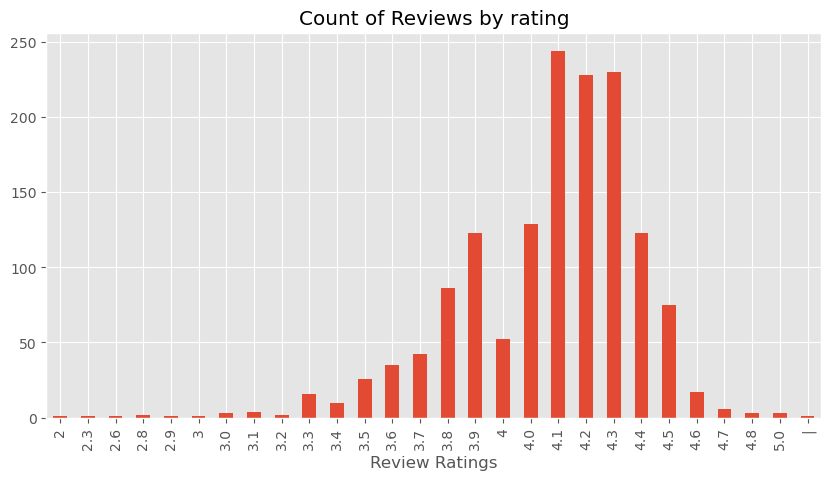

In [3]:
ax = df['rating'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by rating',
          figsize=(10, 5))
ax.set_xlabel('Review Ratings')
plt.show()

### Some Basic NLTK

In [4]:
# nltk downloads 

nltk.download('punkt') # for nltk.word_tokenize
nltk.download('averaged_perceptron_tagger') # for nltk.pos_tag
nltk.download('maxent_ne_chunker') # for nltk.chunk.ne_chunk
nltk.download('words') # for nltk.chunk.ne_chunk

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [5]:
example = df['review_content'][0]
print(example)

Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money


In [6]:
tokens = nltk.word_tokenize(example)
tokens[:10]

['Looks',
 'durable',
 'Charging',
 'is',
 'fine',
 'tooNo',
 'complains',
 ',',
 'Charging',
 'is']

In [7]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Looks', 'NNP'),
 ('durable', 'JJ'),
 ('Charging', 'NNP'),
 ('is', 'VBZ'),
 ('fine', 'JJ'),
 ('tooNo', 'NN'),
 ('complains', 'NNS'),
 (',', ','),
 ('Charging', 'NNP'),
 ('is', 'VBZ')]

In [8]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Looks/NNP)
  durable/JJ
  Charging/NNP
  is/VBZ
  fine/JJ
  tooNo/NN
  complains/NNS
  ,/,
  Charging/NNP
  is/VBZ
  really/RB
  fast/JJ
  ,/,
  good/JJ
  product./NN
  ,/,
  (PERSON Till/NNP)
  now/RB
  satisfied/VBZ
  with/IN
  the/DT
  quality./NN
  ,/,
  This/DT
  is/VBZ
  a/DT
  good/JJ
  product/NN
  ./.
  The/DT
  charging/VBG
  speed/NN
  is/VBZ
  slower/JJR
  than/IN
  the/DT
  original/JJ
  (ORGANIZATION iPhone/NN)
  cable/NN
  ,/,
  (GPE Good/NNP)
  quality/NN
  ,/,
  would/MD
  recommend/VB
  ,/,
  https/NN
  :/:
  //m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81/JJ
  --/:
  -F1ZgHL._SY88.jpg/NN
  ,/,
  (PERSON Product/NNP)
  had/VBD
  worked/VBN
  well/RB
  till/VB
  date/NN
  and/CC
  was/VBD
  having/VBG
  no/DT
  issue.Cable/JJ
  is/VBZ
  also/RB
  sturdy/JJ
  enough/RB
  .../:
  Have/VBP
  asked/VBN
  for/IN
  replacement/NN
  and/CC
  company/NN
  is/VBZ
  doing/VBG
  the/DT
  same/JJ
  .../:
  ,/,
  (PERSON Value/NNP)
  for/IN
  money/NN)


## VADER Seniment Scoring

VADER (Valence Aware Dictionary and sEntiment Reasoner) - Bag of words approach

In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Matt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Example Usage

In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

analyzer_obj = SentimentIntensityAnalyzer()

In [11]:
analyzer_obj.polarity_scores("I am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [12]:
analyzer_obj.polarity_scores("I am mad")

{'neg': 0.762, 'neu': 0.238, 'pos': 0.0, 'compound': -0.4939}

In [13]:
analyzer_obj.polarity_scores(example)

{'neg': 0.032, 'neu': 0.744, 'pos': 0.224, 'compound': 0.9033}

### Scoring our amazon review data 

In [14]:
# Get the polarity scores for the entire dataset
results = {}
for idx, row in tqdm(df.iterrows(), total=len(df)):
    d = analyzer_obj.polarity_scores(row['review_content'])
    d['review_id'] = row['review_id']
    results[idx] = d

  0%|          | 0/1465 [00:00<?, ?it/s]

In [15]:
# convert sentiment scores to pandas dataframe

vaders_df = pd.DataFrame(results).T
vaders_df.head()

,neg,neu,pos,compound,review_id
0,0.032,0.744,0.224,0.9033,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K..."
1,0.01,0.821,0.169,0.9853,"RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY..."
2,0.0,0.641,0.359,0.6808,"R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2..."
3,0.028,0.8,0.172,0.8316,"R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1..."
4,0.116,0.719,0.165,0.9809,"R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R..."


In [16]:
# combine sentiment scoring with metadata 

vaders_df = vaders_df.merge(df, how="left")
vaders_df.head()

,neg,neu,pos,compound,review_id,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_title,review_content,img_link,product_link
0,0.032,0.744,0.224,0.9033,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,0.032,0.744,0.224,0.9033,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",B07JW1Y6XV,Wayona Nylon Braided 3A Lightning to USB A Syn...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269","[High Compatibility] : iPhone X/XsMax/Xr ,iPho...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LB1-Sy...
2,0.032,0.744,0.224,0.9033,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",B07LGT55SJ,Wayona Usb Nylon Braided Data Sync And Chargin...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",[High Compatibility] : Compatible For iPhone X...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-Syncing-C...
3,0.032,0.744,0.224,0.9033,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",B07JH1C41D,Wayona Nylon Braided (2 Pack) Lightning Fast U...,Computers&Accessories|Accessories&Peripherals|...,₹649,"₹1,999",68%,4.2,"24,269","[High Compatibility] : iPhone X/XsMax/Xr ,iPho...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/I/412fvb7k2F...,https://www.amazon.in/Wayona-Braided-WN3LG2-Sy...
4,0.032,0.744,0.224,0.9033,"R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...",B07JGDB5M1,Wayona Nylon Braided 2M / 6Ft Fast Charge Usb ...,Computers&Accessories|Accessories&Peripherals|...,₹449,"₹1,299",65%,4.2,"24,269","[High Compatibility] : Phone X/XsMax/Xr ,Phone...","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN6LG1-Sy...


### Plot VADER results

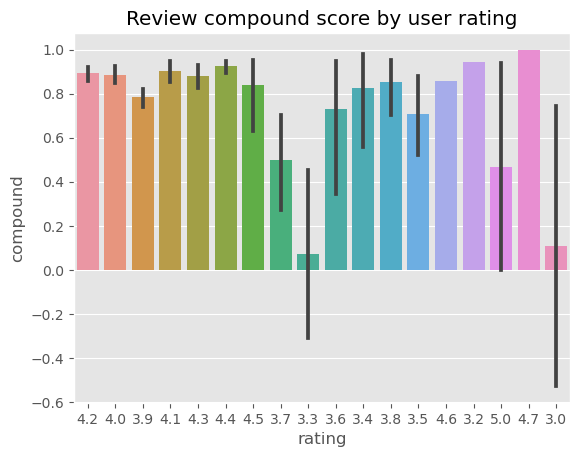

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.barplot(data=vaders_df.head(1000), x='rating', y='compound')
ax.set_title('Review compound score by user rating')
plt.show()

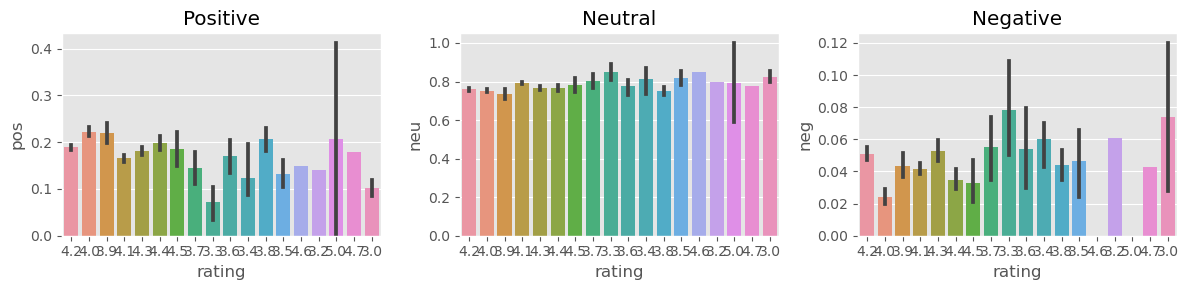

In [19]:
fig1, axs1 = plt.subplots(1, 3, figsize=(12, 3))
sns.barplot(data=vaders_df.head(1000), x='rating', y='pos', ax=axs1[0])
sns.barplot(data=vaders_df.head(1000), x='rating', y='neu', ax=axs1[1])
sns.barplot(data=vaders_df.head(1000), x='rating', y='neg', ax=axs1[2])
axs1[0].set_title('Positive')
axs1[1].set_title('Neutral')
axs1[2].set_title('Negative')
plt.tight_layout()
plt.show()

You can see in the plot that most of the reviews in the dataset are positive and the model is generally accurate with the scoring

## Huggingface pipeline

The following is an example of importing a model from the huggingface, which has a ton of free models available for public use.

In [20]:
from transformers import pipeline

In [21]:
sent_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [22]:
for index, row in df.head(3).iterrows():
    print(f"Review {index+1}")
    print(f"Title: {row['review_title']}")
    print(f"Rating: {row['rating']}")
    print(f"Hugging face default sentiment analysis model score:\n{sent_pipeline(row['review_content'][:512])}")
    print(f"Content:\n{row['review_content']}")
    print()

Review 1
Title: Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good
Rating: 4.2
Hugging face default sentiment analysis model score:
[{'label': 'POSITIVE', 'score': 0.9840972423553467}]
Content:
Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money

Review 2
Title: A Good Braided Cable for Your Type C Device,Good quality product from ambrane,Super cable,As,Good quality,Good product,its good,Good quality for the price but one issue with my unit
Rating: 4.0
Hugging face default sentiment analys

### Sources

- Dataset: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset/
- Learning Resources
    - https://www.youtube.com/watch?v=QpzMWQvxXWk
    - https://towardsdatascience.com/intro-to-nltk-for-nlp-with-python-87da6670dde
    - https://www.datacamp.com/tutorial/text-analytics-beginners-nltk
    - good ol chatgpt